In [1]:
import pandas as pd

In [2]:
# import dataset
from pycaret.datasets import get_data
df_insurance = get_data('insurance')

# to see all the datasets in PyCaret
#all_datasets = get_data('index')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# let's inspect the attributes
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df_insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [5]:
# Importing module and initializing setup
from pycaret.regression import *
#reg1 = setup(data = df_insurance, target = 'charges')
reg1 = setup(data = df_insurance, target = 'charges', numeric_features=['children'])

,Description,Value
0,session_id,7461
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 9)"


In [6]:
# return best model
rf = create_model('rf')

# run this is you want to compare all the models 
#best = compare_models()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2384.2241,19861382.5429,4456.6111,0.8615,0.5038,0.3192
1,3570.2636,35177555.9123,5931.0670,0.8046,0.5092,0.3980
2,2234.7154,18134706.3290,4258.4864,0.8809,0.4340,0.3188
3,2989.6884,25839604.5369,5083.2671,0.8208,0.4995,0.3727
4,2710.9444,25124934.9544,5012.4779,0.7716,0.5368,0.3591
5,2644.0123,19536350.7428,4419.9944,0.8601,0.4095,0.3203
6,3181.5158,31008966.0634,5568.5695,0.8177,0.4327,0.3048
7,2371.6391,21517861.7664,4638.7349,0.8744,0.4254,0.2726
8,2438.8137,21528491.4603,4639.8805,0.8648,0.4150,0.2288


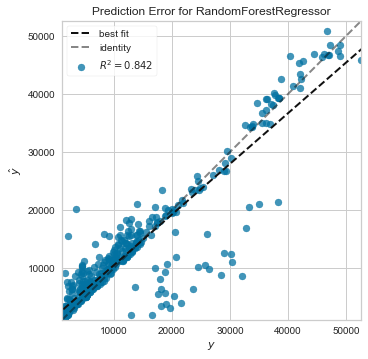

In [7]:
plot_model(rf, plot = 'error')
#We want the values to be along the identity line

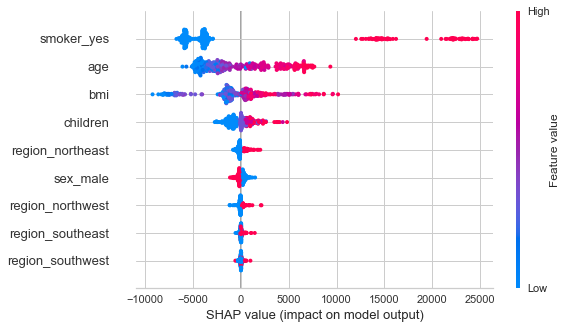

In [8]:
# interpreting model
interpret_model(rf)


The right are positive contributions to the insurance charges.
Left are negative contributions to the insurance chargers

Reading this chart:
* The older you get, your insurance charges will increase
* The higher BMI (more you gain weight), your insurance charges will increase

In [9]:
# finalize a model - use all the data in training
# initially we had 70% of the data to train the model
# finalize uses the remaining 30% to train

final_rf = finalize_model(rf)

In [10]:
# generate predictions on unseen data

test_data = pd.DataFrame({'age': [35], 
                          'sex': ['female'], 
                          'bmi': [21], 
                          'children' : [0], 
                          'smoker': ['no'], 
                          'region': ['southeast']})

predictions = predict_model(final_rf, data = test_data)
predictions

,age,sex,bmi,children,smoker,region,Label
0,35,female,21,0,no,southeast,7448.972205


In [11]:
# save a model
save_model(final_rf, 'rf_model')
save_config('rf_config.pkl')

Transformation Pipeline and Model Successfully Saved


The above we can use the data in a web based model. Saves it to a .pkl file